In [1]:
#basic library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# getting the datasets of true and fake news 
df_true= pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\Fake-News-Project\Fake News Project\True.csv')
df_fake= pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\Fake-News-Project\Fake News Project\Fake.csv')


In [3]:
print("True News: ", df_true.shape)
df_true.head()

True News:  (21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
print(" Fake News : ", df_fake.shape)
df_fake.head()

 Fake News :  (23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


    From here we can see that both fake news dataframe and True news dataframe contain same columns, i.e. title, text, subject, date. All these are feature column. There is no label column, now we need to add label column in both the dataframe stating 'real' and 'fake respectively in both dataframes.

In [5]:
#adding label column to the true news dataframe
df_true['Label']= 'real'


# chceking the dataframe
df_true.head(3)

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real


In [6]:
# adding Label to fakenews dataframe
df_fake['Label'] = 'fake'

# checking the dataframe
df_fake.head(3)

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake


As of now we successfully add Label column in both the dataset, now we need to combine both the dataset.

In [7]:
# we can see that both the dataframe has same columns, let's merge them to make single dataframe,
# this single dataframe consist of both true and fake news. this will be our final dataframe.

df_final= df_true.append(df_fake).sample(frac=1).reset_index().drop(columns=['index'])


df_final.tail(3)

,title,text,subject,date,Label
44895,Brexit transition deal will require new UK leg...,LONDON (Reuters) - The British government is p...,worldnews,"October 26, 2017",real
44896,"Carter blasts Trump's ban on transgender, says...","WASHINGTON (Reuters) - Ash Carter, who was U.S...",politicsNews,"July 26, 2017",real
44897,Highlights: The Trump presidency on March 31 a...,(Reuters) - Highlights of the day for U.S. Pre...,politicsNews,"March 31, 2017",real


Here we randomly merge the two dataframe and reseting there index. 

In [8]:
# getting dimension of final dataframe
df_final.shape

(44898, 5)

From here we can see that we have 44898 data which consist of both fake and real news, we will use this data to build our model.
The primary feature here is title and text, where title news the news headline while text denotes the content of the news. subject colunm consist of general topic on which the news is on. And date denotes the release date of news.

The label column denotes wheather the news is fake or real.

This is our final dataset, on which we need to perform all the model building approach.


Our agenda is to build a model which differentiate between real and fake news.

As we need to deal with object type feature ciolumns, this will be a NLP problem, and we need to dealt with this dataset accordingly.

In [9]:
# Determining the general summary of the final datset.

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


From here we can see that , in our dataset we don't have any null values, as all 44898 entries are non null. Each column including the label column is object data type.

for title ansd text column we need to perform NLP pre processing technique.
We can easily encode our label column. for Subject column we need to check and then do encoding accotrdingly.

for date column we either convert it into proper numerical column, to use it in our dataset.

Let's start with statistical analysis of data.

In [10]:
# statistical analysis of data
df_final.describe(include= 'object')

,title,text,subject,date,Label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


From here it is visible that we have a very wide range of date i.e., near about 2397 unique date count is there. The subject column consist of 8 unique values. Label column which is our target column has two unique value which clearly indicates that it is a classification problem. 
The title and text column is our maintext features, in which NLP preprocessing need to be perform.

In [11]:
df_final['subject'].value_counts()   # getting all the categories for news subject.

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

From here we can see that politics and politicsNews are same. Similarly worldnews and News seems to be same category. So let's remain them.

In [12]:
# replacing/combining the subject column classes
df_final['subject'].replace('politics', 'politicsNews', inplace=True)
df_final['subject'].replace('News', 'worldnews', inplace=True)

# chceking the elements of subject column
df_final['subject'].value_counts()

worldnews          19195
politicsNews       18113
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Now each class of subject column seems different, we can move ahead with visualization

# Visualization (EDA)

fake    23481
real    21417
Name: Label, dtype: int64


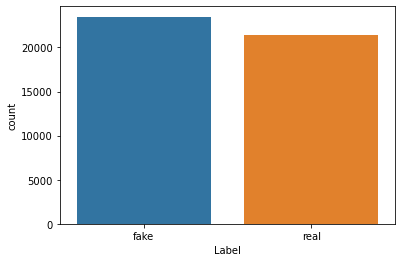

In [13]:
# let's start with label column.
sns.countplot(df_final['Label'])
print(df_final['Label'].value_counts())

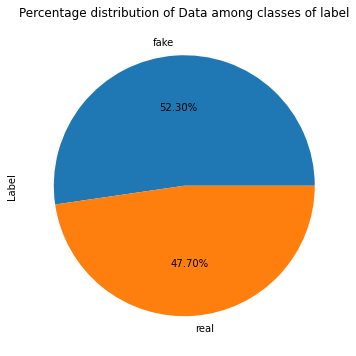

In [14]:
plt.figure(figsize=(10,6))
(df_final['Label'].value_counts()*100.0 /len(df_final)).plot.pie(autopct='%.2f%%')
plt.title("Percentage distribution of Data among classes of label")
plt.show()

From here we can observe that the distribution among fake and real news is almost balanced. Near about 52.3% is fake news and remaining 47.7 % is real news. We can take this as it is, as distibution is mostly same.  

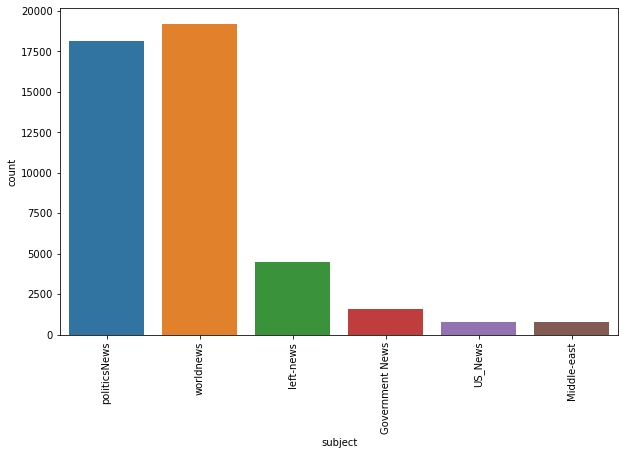

In [15]:
# subject distribution visualization
plt.figure(figsize= (10,6))
sns.countplot(df_final['subject'])
plt.xticks(rotation= 90)
plt.show()

<AxesSubplot:>

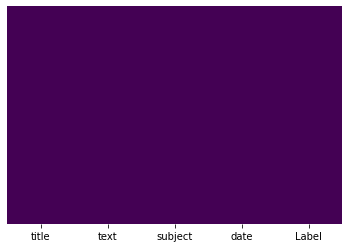

In [16]:
# Visualize null values in the dataset if any
sns.heatmap(df_final.isnull(),yticklabels=False , cbar= False, cmap= 'viridis')

we can observe that entire grid is of one color means there is no null values present in our dataset.

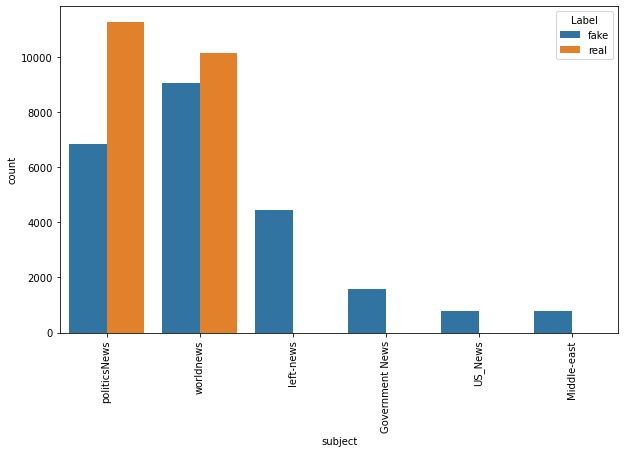

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject', hue='Label', data= df_final)
plt.xticks(rotation= 90)
plt.show()

From above plot it is clear that the subjects for fake and real news are different. except worldnews and politicsNews. Interestingly realnews belongs to only two category worldnews and politicsNews. Rest all subject classes belongs to fake news.



# Feature Extraction

In [18]:
# we have a date column, let's extract useful information from it.
df_final['Date_of_News']= df_final['date'].apply(lambda x:x.split(',')[0])
df_final['Year']= df_final['date'].apply(lambda x:x.split(',')[-1])

df_final.head(3)

,title,text,subject,date,Label,Date_of_News,Year
0,BREAKING: OBAMA WILL VETO BILL Unanimously Pas...,This should come as a surprise to no one Yeste...,politicsNews,"Sep 12, 2016",fake,Sep 12,2016
1,DEMOCRATS AND LIBERAL MEDIA UNCOVERED: ‘Agreem...,The Wikileaks e-mails are an incredible study ...,politicsNews,"Jul 23, 2016",fake,Jul 23,2016
2,Bill Maher Lights Up A Joint And Gets Real Ab...,Bill Maher is a hardcore supporter of the lega...,worldnews,"February 13, 2016",fake,February 13,2016


In [19]:
# let's drop date column , and from Date_of_News column let's seperate date and month.
df_final.drop(columns=['date'],axis= 1, inplace=True)

#splitting Date_of_News column
df_final['Date']= df_final['Date_of_News'].apply(lambda x: x.split(' ')[-1])
df_final['Month']= df_final['Date_of_News'].apply(lambda x: x.split(' ')[0])

# chceking the dataset
df_final.head(2)

,title,text,subject,Label,Date_of_News,Year,Date,Month
0,BREAKING: OBAMA WILL VETO BILL Unanimously Pas...,This should come as a surprise to no one Yeste...,politicsNews,fake,Sep 12,2016,12,Sep
1,DEMOCRATS AND LIBERAL MEDIA UNCOVERED: ‘Agreem...,The Wikileaks e-mails are an incredible study ...,politicsNews,fake,Jul 23,2016,23,Jul


In [20]:
# dropping Date_of_News column
df_final.drop('Date_of_News', axis=1, inplace=True)
df_final.head(2)

,title,text,subject,Label,Year,Date,Month
0,BREAKING: OBAMA WILL VETO BILL Unanimously Pas...,This should come as a surprise to no one Yeste...,politicsNews,fake,2016,12,Sep
1,DEMOCRATS AND LIBERAL MEDIA UNCOVERED: ‘Agreem...,The Wikileaks e-mails are an incredible study ...,politicsNews,fake,2016,23,Jul


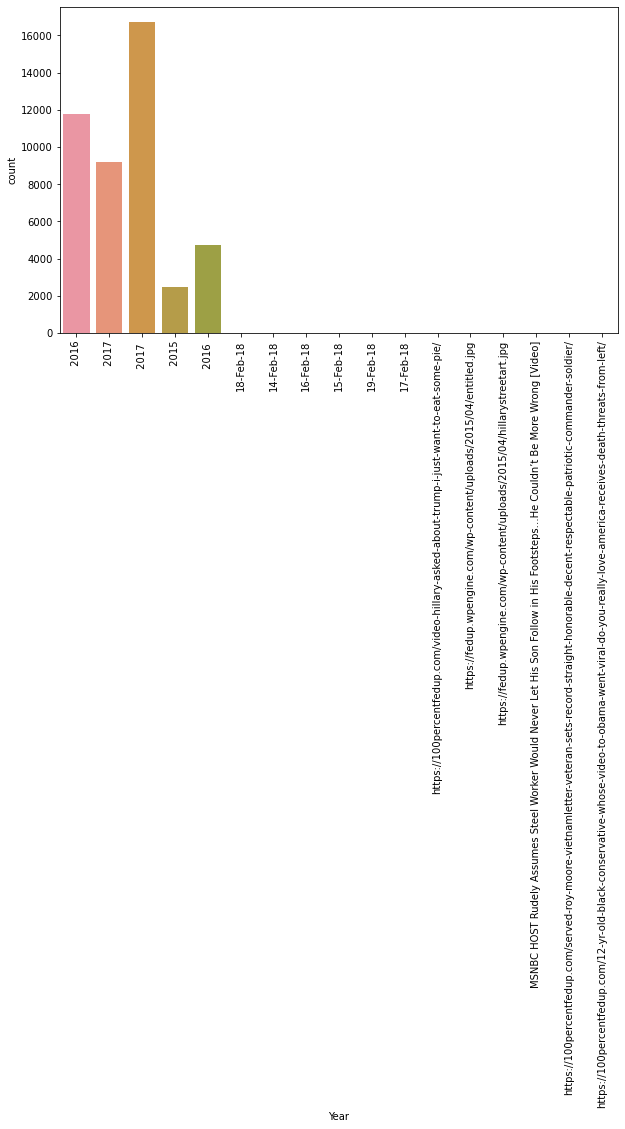

In [21]:
plt.figure(figsize=(10,6))
sns.countplot('Year', data= df_final)
plt.xticks(rotation=90)
plt.show()

From here we can say that the date was not in uniform format, we need to further elobrate it.

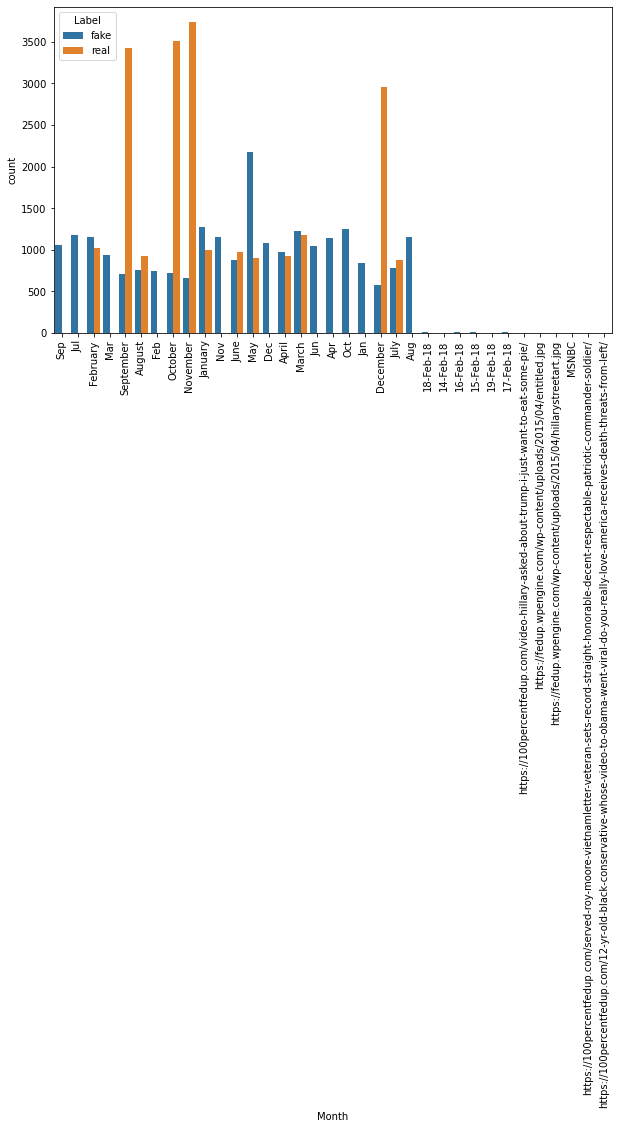

In [22]:
plt.figure(figsize=(10,6))
sns.countplot('Month',hue='Label', data= df_final)
plt.xticks(rotation= 90)
plt.show() 

From above plot also it is evident that the date is not in uniform format. we need to merge Nov to November, Jul to July and so on. Or we can simply drop the column, as I dont think fake news detection depends on date anyways.

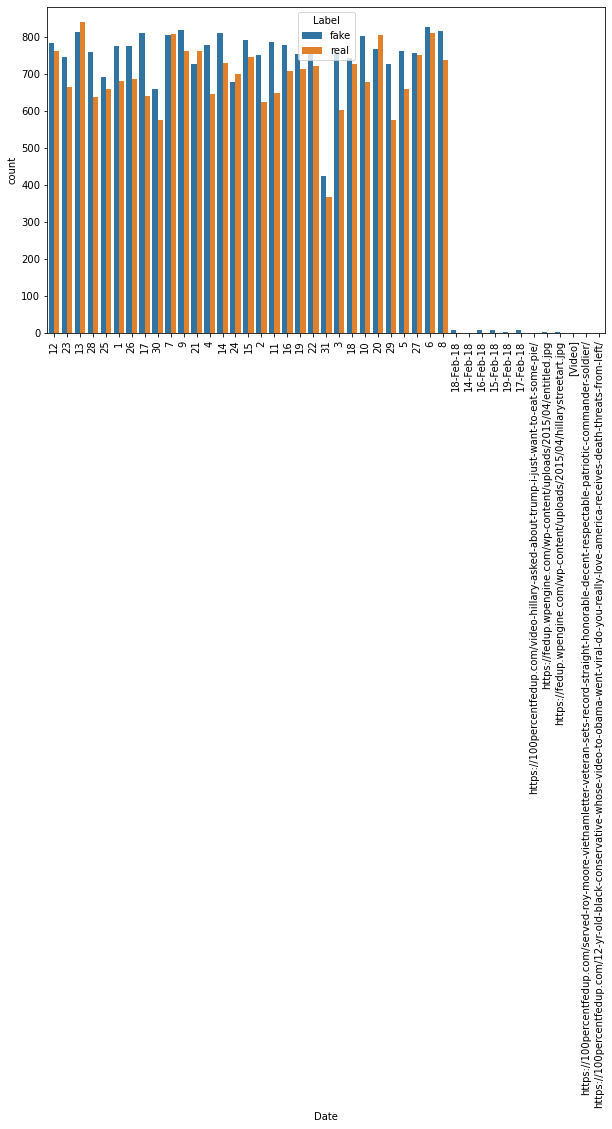

In [23]:
plt.figure(figsize=(10,6))
sns.countplot('Date',hue= 'Label', data= df_final)
plt.xticks(rotation =90)
plt.show()

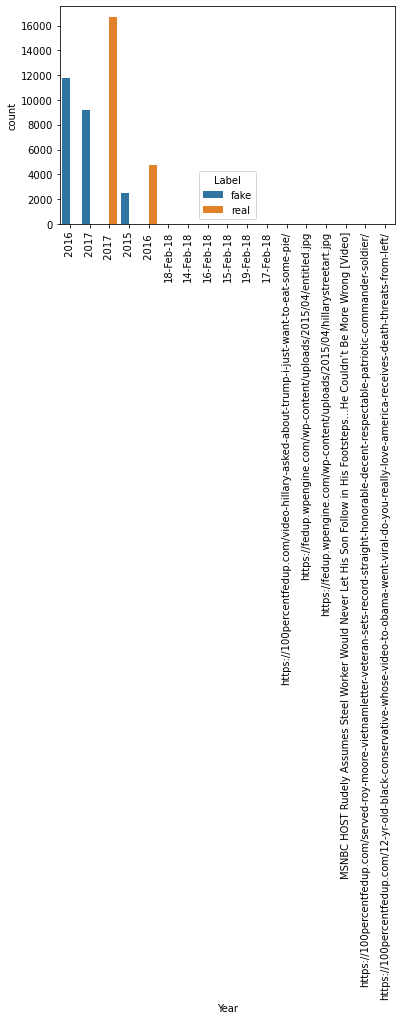

In [24]:
sns.countplot('Year', hue= 'Label', data= df_final)
plt.xticks(rotation = 90)
plt.show()

We can observe that we got fake news data from 2015, 2016, 2017 while real news data is from 2016,2017.
Althought we don't see any strong connection between Year and Label. 

As this is purely NLP problem, droping date column will be a good option.

In [25]:
df_final.drop(columns=['Date','Year', 'Month'], axis= 1, inplace=True)

subject
Government News     1570
Middle-east          778
US_News              783
left-news           4459
politicsNews       18113
worldnews          19195
Name: text, dtype: int64


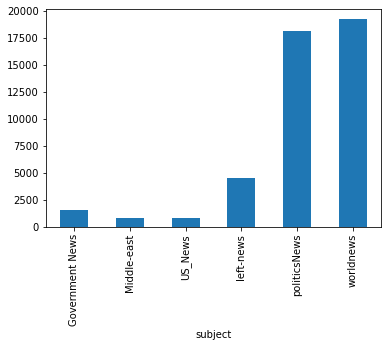

In [26]:
# How many articles per subject?
print(df_final.groupby(['subject'])['text'].count())
df_final.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

Label
fake    23481
real    21417
Name: text, dtype: int64


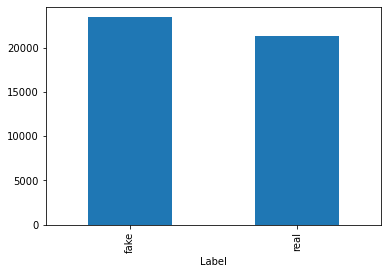

In [28]:
# How many fake and real articles?
print(df_final.groupby(['Label'])['text'].count())
df_final.groupby(['Label'])['text'].count().plot(kind="bar")
plt.show()


The one above plot indicates the number of article per subjects, while the just above one indicates the number of real and fake news articles.

# Pre-Processing 


1. Data cleaning

In [29]:
# Importing necessary library
from IPython.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

import re

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud,STOPWORDS

In [30]:
# Checking for duplicated data
df_final.duplicated().sum()

213

In our dataset we got 213 duplicate data, it better to drop duplicates. This will help us to get work on clean dataset with all unique values.

In [31]:
# dropping duplicates
data= df_final.drop_duplicates()

data.shape

(44685, 4)

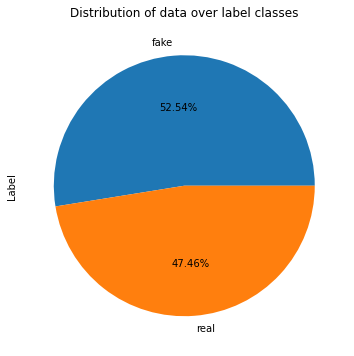

In [32]:
# chceking Label distribution after droping duplicates
plt.figure(figsize=(10,6))
(data['Label'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.2f%%')
plt.title("Distribution of data over label classes")
plt.show()

It's more or less in the same line, we can say fraction %age of fake news increase and real news decreases.


2. Pre-Processing of the text columns.

In [33]:
#expanding english language contractions:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", "s", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\'u", " you", phrase)
    
    return phrase
    

In [34]:
# defining stop words and lemmatizer
stop_words=set(stopwords.words('english')+ ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure', 'dun'])
lemmatizer= WordNetLemmatizer()


In [35]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data['title'] = data['title'].apply(lambda x: x.lower())
data.head(2)

,title,text,subject,Label
0,breaking: obama will veto bill unanimously pas...,this should come as a surprise to no one yeste...,politicsNews,fake
1,democrats and liberal media uncovered: ‘agreem...,the wikileaks e-mails are an incredible study ...,politicsNews,fake


In [36]:
# remove punctuation
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data['title'] = data['title'].apply(punctuation_removal)

In [37]:
# removing stopwords
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

data.head(3)

,title,text,subject,Label
0,breaking obama veto bill unanimously passed co...,come surprise one yesterday 15th anniversary w...,politicsNews,fake
1,democrats liberal media uncovered ‘agreement’ ...,wikileaks emails incredible study political de...,politicsNews,fake
2,bill maher lights joint gets real pot legaliza...,bill maher hardcore supporter legalization mar...,worldnews,fake


In [38]:
preprocessed_text=[]
from tqdm import tqdm
#tqdm is for printing the status bar
for sentance in tqdm(data['text'].values):
    sent= decontracted(sentance)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent)    #remove hyperlinks
    sent = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$','', sent)    # remove emails
    sent = re.sub(r'[^\w\d\s]', '',sent )      # removing punctuation if any still present 
    sent = re.sub('[^A-Za-z]+', ' ', sent)      #remove special characters, numbers

    sent = ' '.join(lemmatizer.lemmatize(e) for e in sent.split())   # lemmatization
    preprocessed_text.append(sent.lower().strip()) # converting the text to lower case

100%|██████████| 44685/44685 [01:04<00:00, 692.17it/s]


In [39]:
# similar cleaning technique for title as well
preprocessed_title= []
for sentance in tqdm(data['title'].values):
    sent= decontracted(sentance)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent)    #remove hyperlinks
    sent = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$','', sent)    # remove emails
    sent = re.sub(r'[^\w\d\s]', '',sent )      # removing punctuation if any still present 
    sent = re.sub('[^A-Za-z]+', ' ', sent)      #remove special characters, numbers

    sent = ' '.join(lemmatizer.lemmatize(e) for e in sent.split())   # lemmatization
    preprocessed_title.append(sent.lower().strip()) # converting the text to lower case
    

100%|██████████| 44685/44685 [00:03<00:00, 12162.01it/s]


In [40]:
data['title']= preprocessed_title
data['text']= preprocessed_text     # assigning clean value to the dataset

# chceking dataset
data.head(3)

,title,text,subject,Label
0,breaking obama veto bill unanimously passed co...,come surprise one yesterday th anniversary wor...,politicsNews,fake
1,democrat liberal medium uncovered agreement ve...,wikileaks email incredible study political des...,politicsNews,fake
2,bill maher light joint get real pot legalizati...,bill maher hardcore supporter legalization mar...,worldnews,fake


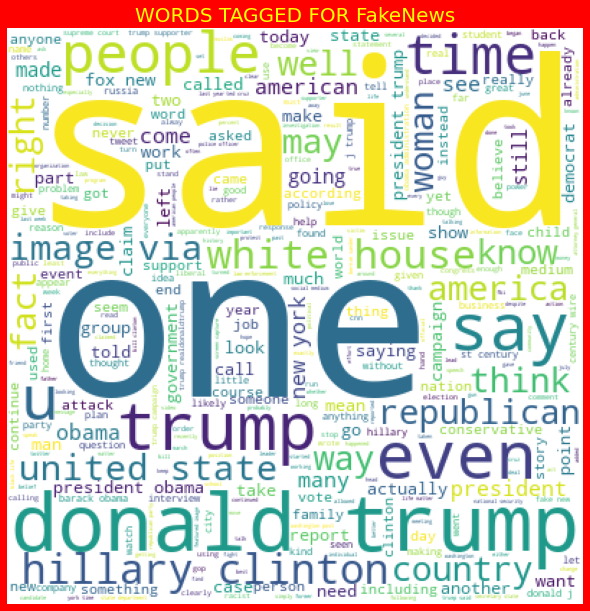

In [41]:
# making a dataframe which consist of fake text using which we will identify desired text.
one = data['text'][data['Label']=='fake']

one_cloud = WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED FOR FakeNews',fontdict={'fontsize':20, 'fontweight':20, 'color':'yellow'})
plt.show()


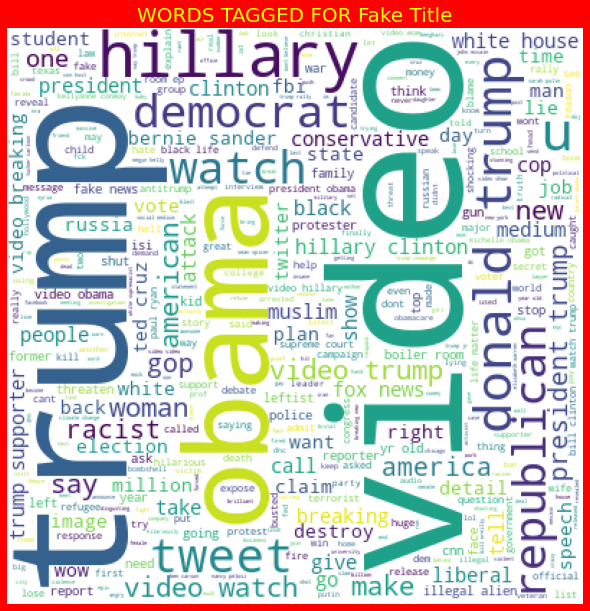

In [42]:
# making a dataframe which consist of fake title using which we will identify desired text.
one = data['title'][data['Label']=='fake']

one_cloud = WordCloud(width=400,height=400,background_color='white',max_words=400).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED FOR Fake Title',fontdict={'fontsize':20, 'fontweight':20, 'color':'yellow'})
plt.show()


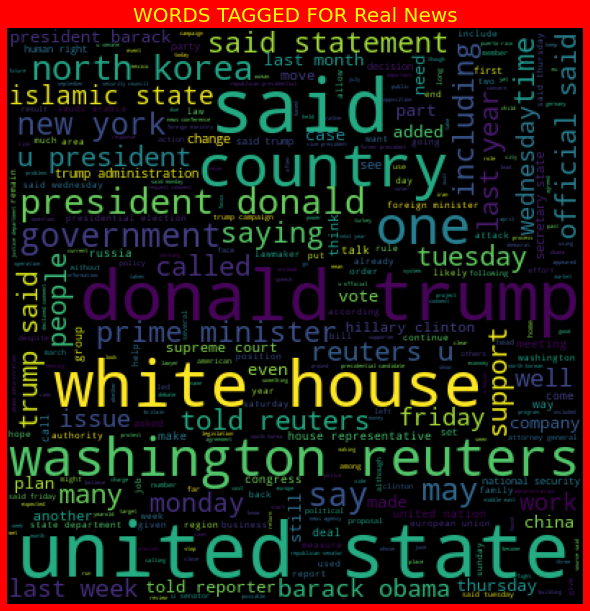

In [43]:
# making a dataframe which consist of real text using which we will identify desired text.
one = data['text'][data['Label']=='real']

one_cloud = WordCloud(width=400,height=400,max_words=400).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED FOR Real News',fontdict={'fontsize':20, 'fontweight':20, 'color':'yellow'})
plt.show()

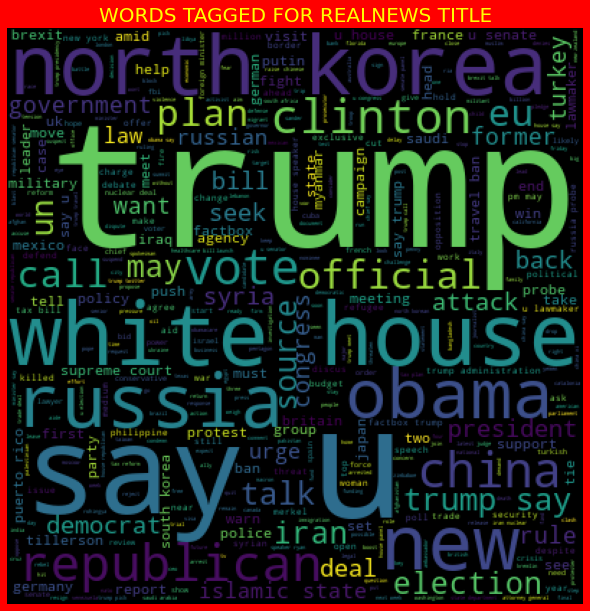

In [44]:
# making a dataframe which consist of fake title using which we will identify desired text.
one = data['title'][data['Label']=='real']

one_cloud = WordCloud(width=400,height=400,max_words=400).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED FOR REALNEWS TITLE',fontdict={'fontsize':20, 'fontweight':20, 'color':'yellow'})
plt.show()

Above four plots are the wordcloud for the words which are abudantly in fake news (text and title) and real news (text and title). The first two with white background denotes fake news text and tile, while last two with black background denotes wordcloud for real news text and title.

The wordcloud consist of top 400 words each which appears in the text and title of fake and real news respectively. The large font words most frequently appearing words.


# Encoding

In [45]:
# we need to encode our subject column and Label column
# Using Label Encoder for subject column, as we don't want to increase the number of columns
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

data['subject']= lab_enc.fit_transform(data['subject'])


# encoding Label column
data['Label']= data['Label'].map({'real': 0, 'fake': 1})

# chceking the dataset
data.head(3)

,title,text,subject,Label
0,breaking obama veto bill unanimously passed co...,come surprise one yesterday th anniversary wor...,4,1
1,democrat liberal medium uncovered agreement ve...,wikileaks email incredible study political des...,4,1
2,bill maher light joint get real pot legalizati...,bill maher hardcore supporter legalization mar...,5,1


We successfully encode our subject and label column, now we need to encode our text and title column for that we can either perform tfidf vectorization or Word2Vec vectorization.

# Splitting data into train test and cv

In [46]:
#importing library

from sklearn.model_selection import train_test_split


In [47]:
# Separating Features and Label.
x= data.drop('Label', axis=1)     #feature
output= data.Label              #label

In [48]:
# Splitting data into three set 
train,test,train_output,test_output= train_test_split(x,output,test_size=0.3, random_state=0, stratify= output)


train_modified,cv,train_output_modified,cv_output = train_test_split(train, train_output,test_size=0.3,
                                                                     stratify= train_output,random_state=0)

In [49]:
# chceking the dimensions of input(features)
train.shape,cv.shape, test.shape

((31279, 3), (9384, 3), (13406, 3))

In [50]:
#checking dimensions of label.
train_output.shape, cv_output.shape, test_output.shape

((31279,), (9384,), (13406,))

Here we split dataset into three different set and will use the second split for cross validation. As this gives more accuracy and also improves the efficiany. here we use train data for training the dataset, test data for testing the dataset, and cv for cross validation purpose. We don't want any dataleakage, that's the reason we are doing in this way.

# Vectorization

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
#initiation of module
text_tfidf_vectorizer = TfidfVectorizer(min_df= 5)


In [53]:
# Encoding train text
train_text_tfidf= text_tfidf_vectorizer.fit_transform(train['text'].values)

In [54]:
# Encoding CV and test text
cv_text_tfidf= text_tfidf_vectorizer.transform(cv['text'].values)
test_text_tfidf= text_tfidf_vectorizer.transform(test['text'].values)

In [55]:
# perform similar vectorization for title also
train_title_tfidf= text_tfidf_vectorizer.transform(train['title'].values)
cv_title_tfidf= text_tfidf_vectorizer.transform(cv['title'].values)
test_title_tfidf = text_tfidf_vectorizer.transform(test['title'].values)

We vectorize text column and title column using TFIDF vectorizer. Now let's combine all the feature columns.

# Combining all Encoded Features

In [56]:
from scipy.sparse import hstack

In [57]:
# combining TFIDF encoded features
train_data_final_tfidf= hstack((train_title_tfidf, train_text_tfidf))
cv_data_final_tfidf= hstack((cv_title_tfidf, cv_text_tfidf))
test_data_final_tfidf= hstack((test_title_tfidf, test_text_tfidf))

In [58]:
train_data_final_tfidf.shape, cv_data_final_tfidf.shape, test_data_final_tfidf.shape    #chceking the dimension after vectorization

((31279, 67080), (9384, 67080), (13406, 67080))

Above one is our final vectorized, standardized dataset which we will use in the final model building.

# Modelling

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, classification_report

In [60]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Multinomial Naive bayes with TFIDF vectorization



In [61]:
alpha_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha_range:
    nb_clf = MultinomialNB(alpha= i, fit_prior= True)
    nb_clf.fit(train_data_final_tfidf, train_output)
    
    train_prob= nb_clf.predict_proba(train_data_final_tfidf)[:,1]
    train_AUC= roc_auc_score(train_output, train_prob)
    print("For alpha =%f, train AUC =%f" % (i, train_AUC))
    
    cv_prob = nb_clf.predict_proba(cv_data_final_tfidf)[:,1]
    cv_AUC = roc_auc_score(cv_output, cv_prob)
    print("For alpha =%f, cv AUC =%f" % (i, cv_AUC))
    
    train_scores = nb_clf.predict(train_data_final_tfidf)
    train_f1 = f1_score(train_output, train_scores)
    print("For alpha =%f, train f1 score =%f" % (i, train_f1))
    
    cv_scores = nb_clf.predict(cv_data_final_tfidf)
    cv_f1 = f1_score(cv_output, cv_scores)
    print("For alpha =%f, cv f1 score =%f" % (i, cv_f1))
    
    print("-"*50)
    

For alpha =0.000010, train AUC =0.999106
For alpha =0.000010, cv AUC =0.999013
For alpha =0.000010, train f1 score =0.986411
For alpha =0.000010, cv f1 score =0.985662
--------------------------------------------------
For alpha =0.000100, train AUC =0.998902
For alpha =0.000100, cv AUC =0.998771
For alpha =0.000100, train f1 score =0.985316
For alpha =0.000100, cv f1 score =0.984242
--------------------------------------------------
For alpha =0.001000, train AUC =0.998567
For alpha =0.001000, cv AUC =0.998390
For alpha =0.001000, train f1 score =0.983455
For alpha =0.001000, cv f1 score =0.983017
--------------------------------------------------
For alpha =0.010000, train AUC =0.997959
For alpha =0.010000, cv AUC =0.997717
For alpha =0.010000, train f1 score =0.980671
For alpha =0.010000, cv f1 score =0.980579
--------------------------------------------------
For alpha =0.100000, train AUC =0.996708
For alpha =0.100000, cv AUC =0.996424
For alpha =0.100000, train f1 score =0.975549

We can observe that at alpha 0.00001 we got best AUC score and F1 score.

In [62]:
nb_clf_best= MultinomialNB(alpha=0.00001, fit_prior= True)
nb_clf_best.fit(train_data_final_tfidf, train_output)

test_prob= nb_clf_best.predict_proba(test_data_final_tfidf)[:,1]
test_AUC_nb=roc_auc_score(test_output, test_prob)
print("For alpha=0.00001, test AUC = %f" % (test_AUC_nb))

test_scores=nb_clf_best.predict(test_data_final_tfidf)
test_f1_nb= f1_score(test_output, test_scores)
print("For alpha = 0.00001, test f1 scores =%f" % (test_f1_nb))

For alpha=0.00001, test AUC = 0.991380
For alpha = 0.00001, test f1 scores =0.958664


In [63]:
# classification report 
print(classification_report(test_output, test_scores))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6363
           1       0.94      0.98      0.96      7043

    accuracy                           0.96     13406
   macro avg       0.96      0.95      0.96     13406
weighted avg       0.96      0.96      0.96     13406



Confusion matrix, without normalization


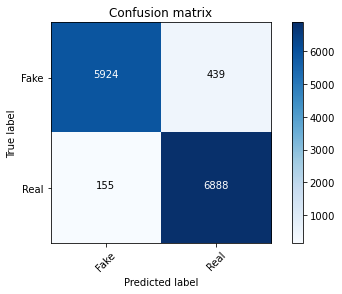

In [64]:
# confusion matrix
cm = metrics.confusion_matrix(test_output, test_scores)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


We can observe that MultinomialNB with TFIDF vectorizer model gives decent score, we got an accuracy of .96, AUC scores of .99 and f1 score of .9595

From above confusion matrix , type 1 type 2 error values are clear.


# Logistic Regression 

In [65]:
c_range=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
for i in c_range:
    lr= LogisticRegression(C= i, max_iter=300)
    lr.fit(train_data_final_tfidf, train_output)
    
    train_prob= lr.predict_proba(train_data_final_tfidf)[:,1]
    train_AUC= roc_auc_score(train_output, train_prob)
    print("For  C=%f, train AUC =%f" % (i, train_AUC))
    
    cv_prob = lr.predict_proba(cv_data_final_tfidf)[:,1]
    cv_AUC = roc_auc_score(cv_output, cv_prob)
    print("For C =%f, cv AUC =%f" % (i, cv_AUC))
    
    train_scores = lr.predict(train_data_final_tfidf)
    train_f1 = f1_score(train_output, train_scores)
    print("For C =%f, train f1 score =%f" % (i, train_f1))
    
    cv_scores = lr.predict(cv_data_final_tfidf)
    cv_f1 = f1_score(cv_output, cv_scores)
    print("For C =%f, cv f1 score =%f" % (i, cv_f1))
    
    print("-"*50)
    
    
    

For  C=0.000100, train AUC =0.988425
For C =0.000100, cv AUC =0.988020
For C =0.000100, train f1 score =0.688869
For C =0.000100, cv f1 score =0.688836
--------------------------------------------------
For  C=0.001000, train AUC =0.989295
For C =0.001000, cv AUC =0.988877
For C =0.001000, train f1 score =0.828650
For C =0.001000, cv f1 score =0.828051
--------------------------------------------------
For  C=0.010000, train AUC =0.993825
For C =0.010000, cv AUC =0.993298
For C =0.010000, train f1 score =0.967956
For C =0.010000, cv f1 score =0.966957
--------------------------------------------------
For  C=0.100000, train AUC =0.998729
For C =0.100000, cv AUC =0.998309
For C =0.100000, train f1 score =0.986535
For C =0.100000, cv f1 score =0.985230
--------------------------------------------------
For  C=1.000000, train AUC =0.999955
For C =1.000000, cv AUC =0.999916
For C =1.000000, train f1 score =0.997686
For C =1.000000, cv f1 score =0.997156
------------------------------------

we can observe that the value of C = 100 and onwords we are getting perfect 1 score for both AUC and F1. so let's take C =100 for test data.

In [66]:
lr_clf= LogisticRegression(C= 100, max_iter=300)
lr_clf.fit(train_data_final_tfidf, train_output)

test_prob= lr_clf.predict_proba(test_data_final_tfidf)[:,1]
test_AUC_lr=roc_auc_score(test_output, test_prob)
print("For C=1, test AUC = %f" % (test_AUC_lr))

test_scores=lr_clf.predict(test_data_final_tfidf)
test_f1_lr= f1_score(test_output, test_scores)
print("For C=1, test f1 scores =%f" % (test_f1_lr))

For C=1, test AUC = 0.999818
For C=1, test f1 scores =0.996735


In [67]:
# classification report
print("Classification Report For Logistic regression Model\n")
print(classification_report(test_output, test_scores))

Classification Report For Logistic regression Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6363
           1       1.00      1.00      1.00      7043

    accuracy                           1.00     13406
   macro avg       1.00      1.00      1.00     13406
weighted avg       1.00      1.00      1.00     13406



Confusion matrix, without normalization


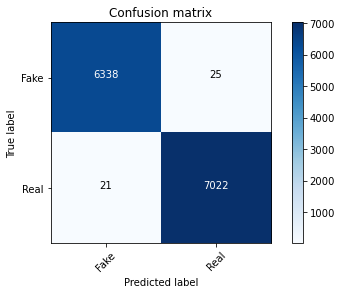

In [68]:
# confusion matrix
cm = metrics.confusion_matrix(test_output, test_scores)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


Logistic regression seems to be the best fitted model so far with AUC score of 0.999 and f1 score of 0.995.
Even the confusion matrix shows good result for this model.

Let's see how ensemble technique perform for our dataset.



# Ensemble Technique (RandomForest Classifier)

In [69]:
from sklearn.ensemble import RandomForestClassifier


In [70]:
n_esti=[10,50,80,100, 120]
for i in n_esti:
    rf= RandomForestClassifier(n_estimators= i)
    rf.fit(train_data_final_tfidf, train_output)
    
    train_prob= rf.predict_proba(train_data_final_tfidf)[:,1]
    train_AUC= roc_auc_score(train_output, train_prob)
    print("For  n_estimator=%f, train AUC =%f" % (i, train_AUC))
    
    cv_prob = rf.predict_proba(cv_data_final_tfidf)[:,1]
    cv_AUC = roc_auc_score(cv_output, cv_prob)
    print("For n_estimator=%f, cv AUC =%f" % (i, cv_AUC))
    
    train_scores = rf.predict(train_data_final_tfidf)
    train_f1 = f1_score(train_output, train_scores)
    print("For n_estimators=%f, train f1 score =%f" % (i, train_f1))
    
    cv_scores = rf.predict(cv_data_final_tfidf)
    cv_f1 = f1_score(cv_output, cv_scores)
    print("For n_estimators=%f, cv f1 score =%f" % (i, cv_f1))
    
    print("-"*50)


For  n_estimator=10.000000, train AUC =1.000000
For n_estimator=10.000000, cv AUC =0.999999
For n_estimators=10.000000, train f1 score =0.999726
For n_estimators=10.000000, cv f1 score =0.999696
--------------------------------------------------
For  n_estimator=50.000000, train AUC =1.000000
For n_estimator=50.000000, cv AUC =1.000000
For n_estimators=50.000000, train f1 score =1.000000
For n_estimators=50.000000, cv f1 score =1.000000
--------------------------------------------------
For  n_estimator=80.000000, train AUC =1.000000
For n_estimator=80.000000, cv AUC =1.000000
For n_estimators=80.000000, train f1 score =1.000000
For n_estimators=80.000000, cv f1 score =1.000000
--------------------------------------------------
For  n_estimator=100.000000, train AUC =1.000000
For n_estimator=100.000000, cv AUC =1.000000
For n_estimators=100.000000, train f1 score =1.000000
For n_estimators=100.000000, cv f1 score =1.000000
--------------------------------------------------
For  n_estim

For n_estimators values 50 and onward we can observe that the value for AUC and F1 scores is perfect 1.
Let's consider n_estimartors value 50 and build the model to check for test data.

For n_estimator=50, test AUC = 0.999697
For n_estimator=50, test f1 scores =0.993598

---------------------------------------------------------


Classification Report For RandomForest Model

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6363
           1       1.00      0.99      0.99      7043

    accuracy                           0.99     13406
   macro avg       0.99      0.99      0.99     13406
weighted avg       0.99      0.99      0.99     13406


Confusion Matrix for RandomForest 

Confusion matrix, without normalization


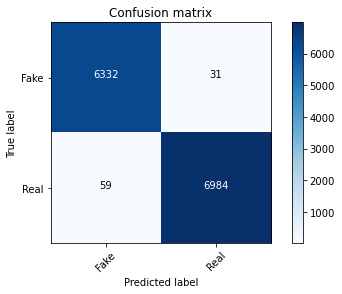

In [71]:
rf_clf= RandomForestClassifier(n_estimators = 50)
rf_clf.fit(train_data_final_tfidf, train_output)

test_prob= rf_clf.predict_proba(test_data_final_tfidf)[:,1]
test_AUC_rf=roc_auc_score(test_output, test_prob)
print("For n_estimator=50, test AUC = %f" % (test_AUC_rf))

test_scores=rf_clf.predict(test_data_final_tfidf)
test_f1_rf= f1_score(test_output, test_scores)
print("For n_estimator=50, test f1 scores =%f" % (test_f1_rf))

print("\n---------------------------------------------------------\n\n")
# classification report
print("Classification Report For RandomForest Model\n")
print(classification_report(test_output, test_scores))


# confusion matrix
print("\nConfusion Matrix for RandomForest \n")
cm = metrics.confusion_matrix(test_output, test_scores)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


We can observe that Random Forest also works pretty decent with out dataset, almost equally good as Logistic Regression.
Let's build Decision Tree model to see how it performs.

# Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
random_stat=[0,10,20,30,40,42,50]
for i in random_stat:
    dt= DecisionTreeClassifier(random_state= i)
    dt.fit(train_data_final_tfidf, train_output)
    
    train_prob= dt.predict_proba(train_data_final_tfidf)[:,1]
    train_AUC= roc_auc_score(train_output, train_prob)
    print("For  random_state=%f, train AUC =%f" % (i, train_AUC))
    
    cv_prob = dt.predict_proba(cv_data_final_tfidf)[:,1]
    cv_AUC = roc_auc_score(cv_output, cv_prob)
    print("For random_state=%f, cv AUC =%f" % (i, cv_AUC))
    
    train_scores = dt.predict(train_data_final_tfidf)
    train_f1 = f1_score(train_output, train_scores)
    print("For random_state=%f, train f1 score =%f" % (i, train_f1))
    
    cv_scores = dt.predict(cv_data_final_tfidf)
    cv_f1 = f1_score(cv_output, cv_scores)
    print("For random_state=%f, cv f1 score =%f" % (i, cv_f1))
    
    print("-"*50)



For  random_state=0.000000, train AUC =1.000000
For random_state=0.000000, cv AUC =1.000000
For random_state=0.000000, train f1 score =1.000000
For random_state=0.000000, cv f1 score =1.000000
--------------------------------------------------
For  random_state=10.000000, train AUC =1.000000
For random_state=10.000000, cv AUC =1.000000
For random_state=10.000000, train f1 score =1.000000
For random_state=10.000000, cv f1 score =1.000000
--------------------------------------------------
For  random_state=20.000000, train AUC =1.000000
For random_state=20.000000, cv AUC =1.000000
For random_state=20.000000, train f1 score =1.000000
For random_state=20.000000, cv f1 score =1.000000
--------------------------------------------------
For  random_state=30.000000, train AUC =1.000000
For random_state=30.000000, cv AUC =1.000000
For random_state=30.000000, train f1 score =1.000000
For random_state=30.000000, cv f1 score =1.000000
--------------------------------------------------
For  random_

We observe that random_state doesnt make huge impact on the model, for all the given values of Randomstate the value for f1 and auc scores remain perfect 1. Let's take 42 as random_state to build a model. 

 Test AUC = 0.995538
For randomstate=42, test f1 scores =0.995815

---------------------------------------------------------


Classification Report For Decison Tree Model

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6363
           1       0.99      1.00      1.00      7043

    accuracy                           1.00     13406
   macro avg       1.00      1.00      1.00     13406
weighted avg       1.00      1.00      1.00     13406


Confusion Matrix for Decision Tree 

Confusion matrix, without normalization


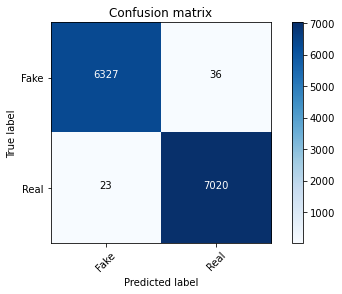

In [74]:
dt_clf= DecisionTreeClassifier(random_state= 42)
dt_clf.fit(train_data_final_tfidf, train_output)

test_prob= dt_clf.predict_proba(test_data_final_tfidf)[:,1]
test_AUC_dt=roc_auc_score(test_output, test_prob)
print(" Test AUC = %f" % (test_AUC_dt))

test_scores=dt_clf.predict(test_data_final_tfidf)
test_f1_dt= f1_score(test_output, test_scores)
print("For randomstate=42, test f1 scores =%f" % (test_f1_dt))

print("\n---------------------------------------------------------\n\n")
# classification report
print("Classification Report For Decison Tree Model\n")
print(classification_report(test_output, test_scores))


# confusion matrix
print("\nConfusion Matrix for Decision Tree \n")
cm = metrics.confusion_matrix(test_output, test_scores)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


We can observe that Decision Tree model perform better than random forest and equally good as logistic Regression.

Let's see how support vector matrix perform for our dataset

# SVC

In [75]:
from sklearn.svm import SVC

 Train AUC =1.000000
 CV AUC =1.000000
 Train f1 score =0.999939
 CV f1 score =0.999899
Test AUC = 0.999844
Test f1 scores =0.996664

---------------------------------------------------------


Classification Report For SVC Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6363
           1       1.00      1.00      1.00      7043

    accuracy                           1.00     13406
   macro avg       1.00      1.00      1.00     13406
weighted avg       1.00      1.00      1.00     13406


Confusion Matrix for SVC 

Confusion matrix, without normalization


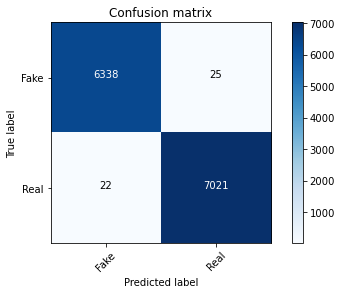

In [78]:
svc= SVC(kernel= 'linear',probability= True)
svc.fit(train_data_final_tfidf, train_output)

train_prob= svc.predict_proba(train_data_final_tfidf)[:,1]
train_AUC= roc_auc_score(train_output, train_prob)
print(" Train AUC =%f" % ( train_AUC))
    
cv_prob = svc.predict_proba(cv_data_final_tfidf)[:,1]
cv_AUC = roc_auc_score(cv_output, cv_prob)
print(" CV AUC =%f" % (cv_AUC))
    
train_scores = svc.predict(train_data_final_tfidf)
train_f1 = f1_score(train_output, train_scores)
print(" Train f1 score =%f" % (train_f1))
    
cv_scores = svc.predict(cv_data_final_tfidf)
cv_f1 = f1_score(cv_output, cv_scores)
print(" CV f1 score =%f" % (cv_f1))
    

test_prob= svc.predict_proba(test_data_final_tfidf)[:,1]
test_AUC_svc=roc_auc_score(test_output, test_prob)
print("Test AUC = %f" % (test_AUC_svc))

test_scores=svc.predict(test_data_final_tfidf)
test_f1_svc= f1_score(test_output, test_scores)
print("Test f1 scores =%f" % (test_f1_svc))

print("\n---------------------------------------------------------\n\n")
# classification report
print("Classification Report For SVC Model\n")
print(classification_report(test_output, test_scores))


# confusion matrix
print("\nConfusion Matrix for SVC \n")
cm = metrics.confusion_matrix(test_output, test_scores)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


From here we can observe that the test AUC score is 0.9998 while Test F1 score is .9966. which is very decent is extremely near to logistic regression.

# XGBoost Classifier

In [79]:
from xgboost import XGBClassifier

xgb= XGBClassifier()

 Train AUC =0.999963
 CV AUC =0.999977
 Train f1 score =0.997868
 CV f1 score =0.998072
Test AUC = 0.999771
Test f1 scores =0.997014

---------------------------------------------------------


Classification Report For XGB Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6363
           1       1.00      1.00      1.00      7043

    accuracy                           1.00     13406
   macro avg       1.00      1.00      1.00     13406
weighted avg       1.00      1.00      1.00     13406


Confusion Matrix for XGB 

Confusion matrix, without normalization


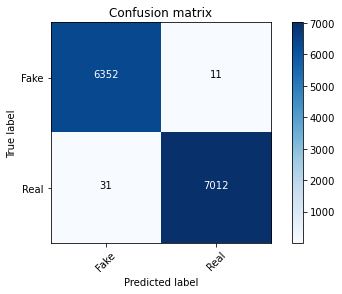

In [82]:
xgb.fit(train_data_final_tfidf, train_output)

train_prob= xgb.predict_proba(train_data_final_tfidf)[:,1]
train_AUC= roc_auc_score(train_output, train_prob)
print(" Train AUC =%f" % ( train_AUC))
    
cv_prob = xgb.predict_proba(cv_data_final_tfidf)[:,1]
cv_AUC = roc_auc_score(cv_output, cv_prob)
print(" CV AUC =%f" % (cv_AUC))
    
train_scores = xgb.predict(train_data_final_tfidf)
train_f1 = f1_score(train_output, train_scores)
print(" Train f1 score =%f" % (train_f1))
    
cv_scores = xgb.predict(cv_data_final_tfidf)
cv_f1 = f1_score(cv_output, cv_scores)
print(" CV f1 score =%f" % (cv_f1))
    

test_prob= xgb.predict_proba(test_data_final_tfidf)[:,1]
test_AUC_xgb=roc_auc_score(test_output, test_prob)
print("Test AUC = %f" % (test_AUC_xgb))

test_scores=xgb.predict(test_data_final_tfidf)
test_f1_xgb= f1_score(test_output, test_scores)
print("Test f1 scores =%f" % (test_f1_xgb))

print("\n---------------------------------------------------------\n\n")
# classification report
print("Classification Report For XGB Model\n")
print(classification_report(test_output, test_scores))


# confusion matrix
print("\nConfusion Matrix for XGB \n")
cm = metrics.confusion_matrix(test_output, test_scores)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


From here we can observe that for XGB model the AUC score is .9997 while f1 scor is .997. Overall this model seems to be good fit for our dataset as well.

Let's plot a summary for all the models.

# Summarizing each Algorithms.

In [85]:
# Summarizing each of the Classification Model
F1_Score=[test_f1_nb,test_f1_lr, test_f1_rf, test_f1_dt, test_f1_svc, test_f1_xgb]
ROC_AUC_SCORE=[test_AUC_nb, test_AUC_lr, test_AUC_rf, test_AUC_dt, test_AUC_svc, test_AUC_xgb]


Model= pd.DataFrame({
    'Models':['MultinomialNB','Logistic Regression','RandomForestClassifier','DecisionTree Classifier', 'Support Vector Machine (SVC)', 'XGBoost Classifier'],
    'F1 Score': F1_Score, 'ROC AUC Score' : ROC_AUC_SCORE })

Model.sort_values(by ='ROC AUC Score', ascending = False )

,Models,F1 Score,ROC AUC Score
4,Support Vector Machine (SVC),0.996664,0.999844
1,Logistic Regression,0.996735,0.999818
5,XGBoost Classifier,0.997014,0.999771
2,RandomForestClassifier,0.993598,0.999697
3,DecisionTree Classifier,0.995815,0.995538
0,MultinomialNB,0.958664,0.991380


From here we can see that top 3 algorithms i.e. SVC, LogisticRegression and XGBoost Classifier are almost tying in there scores. However if we consider both f1 score and AUc score we can see that Logistic regression has edge in both. So i think Logistic Regression seems to be best suited model for our dataset.

Let's go ahead and save it.


# Saving Final Model.

In [86]:
# saving best performing model and saving the model to disk
import pickle
filename= "FakeNews_Detection_project.pk"
pickle.dump(lr_clf, open(filename, 'wb'))

We save the hyper parameter tune algorithm for future use, so that going forward we can take this model as it is. 